In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("default")
sns.set(style="whitegrid")

# Se quiere analizar el csv 'clicks'
auctions = pd.read_csv('/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/auctions.csv')
auctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


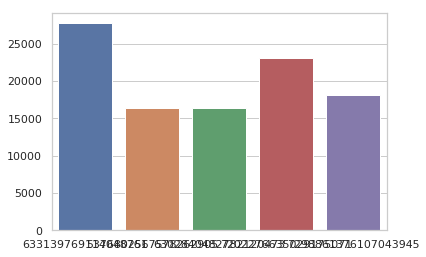

In [2]:
top5 = auctions['device_id'].value_counts().head(5)
grafico = sns.barplot(x=top5.index, y=top5.values)

In [3]:
# Ya tengo los device_id del top 5 de usuarios que participaron de más auctions
# Quiero una solucion idiomática para el problema
top5_disp = auctions.loc[auctions['device_id'].isin(top5.keys() )]
top5_disp.drop(['country','auction_type_id', 'platform', 'ref_type_id', 'source_id'], axis=1, inplace=True)

/home/fedoremelianenko/.local/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
# Con top5_disp preparada, puede empezarse a realizar el analisis temporal de la evolucion de las subastas
top5_disp['date'] = pd.to_datetime(top5_disp['date'])
top5_disp = top5_disp.sort_values(['date'])
top5_disp['day'] = top5_disp['date'].apply(lambda x: x.day)
top5_disp['suma'] = 1
top5_disp.head()

,date,device_id,day,suma
9915406,2019-03-05 00:53:29.247891,5376802567578262905,5,1
7338645,2019-03-05 00:54:15.900817,633139769114048761,5,1
15970606,2019-03-05 00:54:26.022010,633139769114048761,5,1
7339945,2019-03-05 00:54:26.790257,633139769114048761,5,1
14747978,2019-03-05 00:54:43.284826,633139769114048761,5,1


In [35]:
top5_grouped = top5_disp.groupby(['device_id','day']).agg({'suma':'sum'})
top5_grouped.reset_index(inplace = True)
top5_grouped.head()

,device_id,day,suma
0,633139769114048761,5,2255
1,633139769114048761,6,224
2,633139769114048761,7,1877
3,633139769114048761,8,1865
4,633139769114048761,9,2054


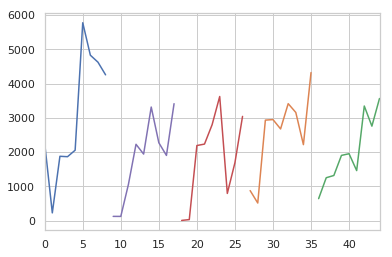

In [34]:
for dispositivo in top5.keys():
    df = top5_grouped.loc[top5_grouped['device_id'] == dispositivo]
    df['suma'].plot()